In [189]:
import numpy as np
import matplotlib.pyplot as mp
from pylab import show
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import pandas as pd
from pandas import DataFrame
from sklearn.ensemble import AdaBoostClassifier

data = np.loadtxt("data.csv")

In [29]:
features = []
digits = []


for row in data:
    if(row[0]==1 or row[0]==5):
        features.append(row[1:]) #add in remaining values past the first (this is a matrix)
        digits.append(str(row[0])) #add the 1 or the 5 to digits

#select the proportion of data to use for training
numTrain = int(len(features)*.2) #we are training on 20% of the data

trainFeatures = features[:numTrain] #we train on the first 20% of the data
testFeatures = features[numTrain:]  #we test on the remaining 80%
trainDigits = digits[:numTrain]     #we train on the first 20% of the data
testDigits = digits[numTrain:]      #we test on the remaining 80%

In [215]:
X = []
Y = []
simpleTrain = []
colors = []
for index in range(len(trainFeatures)):
    X.append((sum(trainFeatures[index])/256)**2) #mean intensity squared
    Y.append(sum((trainFeatures[index][:128]- trainFeatures[index][128:])**2)/256) #horiz symmetry
    simpleTrain.append([(sum(trainFeatures[index])/256)**2,sum((trainFeatures[index][:128]- trainFeatures[index][128:])**2)/256])
    if(trainDigits[index]=="1.0"): #if the digit is 1, it is blue. else, it is red (only 1's and 5's)
        colors.append("b")
    else:
        colors.append("r")
normX = [2*((i - min(X)) / (max(X) - min(X)))-1 for i in X]
normY = [2*((i - min(Y)) / (max(Y) - min(Y)))-1 for i in Y]        

## Q1 A-D NEED TO WORK ON GRAPH (C)

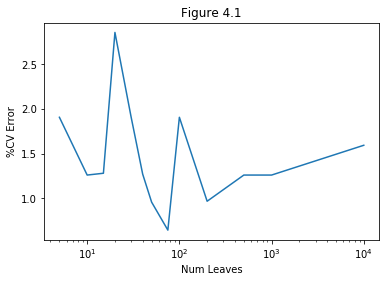

In [171]:
leaves = [5,10,15,20,30,40,50,75,100,200,500,1000,10000]
cverrors = []

for i in leaves:
    model = DecisionTreeClassifier(criterion="entropy", max_leaf_nodes=i)
    model.fit(simpleTrain,trainDigits)
    
    accuracy = cross_val_score(model, trainFeatures, trainDigits, cv=10)
#     print("Max leaf nodes:",i,"\t\t% CV error:",100*(1 - accuracy.mean()))    
    
    cverrors.append(100*(1 - accuracy.mean()))

mp.plot(leaves, cverrors)
mp.xscale("log")
mp.title("Figure 4.1")
mp.ylabel("%CV Error")
mp.xlabel("Num Leaves")
mp.show()


b: I believe that with the lower number of nodes, we are showing some underfitting, which is the increased error as we are at about the 5-15 level. When we approach around 100, we see a noticeable decrease in cross validation error, which I believe is the correctly fit area. As we continue to increase number of leaves, we then see overfitting, as we then see that the error begins to rise again on increasing number of nodes, like around 1000-10000. The reason for this is because when we only have a few number of leaves, we do not have as much room for interpretation and separation. This can lead to some less than desirable decisions. On the flip side, giving us too many nodes will make our results very granular and overly accurate in our training model, which would mean our testing data, if there are any outliers or inconsistencies will all be labeled incorrectly.

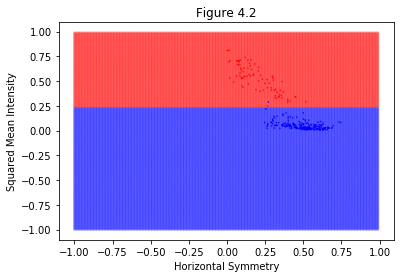

In [222]:
model = DecisionTreeClassifier(criterion="entropy", max_leaf_nodes=100)
model.fit(simpleTrain,trainDigits)

xPred = []
yPred = []
cPred = []
for xP in range(-100,100):
    xP = xP/100.0
    for yP in range(-100,100):
        yP = yP/100.0
        xPred.append(xP)
        yPred.append(yP)
        if(model.predict([[xP,yP]])=="1.0"):
            cPred.append("b")
        else:
            cPred.append("r")

mp.scatter(xPred,yPred,s=3,c=cPred,alpha=.2, )
mp.title("Figure 4.2")
mp.xlabel("Horizontal Symmetry")
mp.ylabel("Squared Mean Intensity")
mp.scatter(X,Y, s=.3, c=colors)
show()

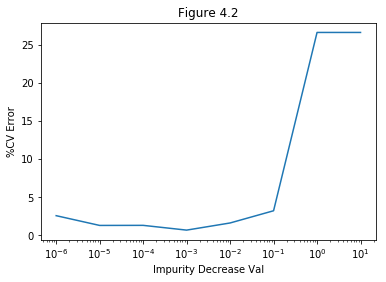

In [188]:
impurity_decrease = [10,1,.1,.01, .001, .0001, .00001, .000001]
cverrors = []

for i in impurity_decrease:
    model = DecisionTreeClassifier(criterion="entropy", min_impurity_decrease=i)
    model.fit(simpleTrain,trainDigits)
    
    accuracy = cross_val_score(model, trainFeatures, trainDigits, cv=10)   
    
    cverrors.append(100*(1 - accuracy.mean()))

mp.plot(impurity_decrease, cverrors)
mp.xscale("log")
mp.title("Figure 4.2")
mp.ylabel("%CV Error")
mp.xlabel("Impurity Decrease Val")
mp.show()

## Q1 E-I REVIEW GRAPH

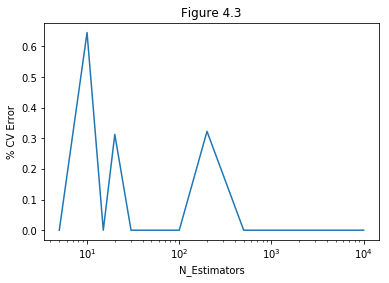

In [130]:
estimators = [5, 10, 15, 20, 30, 40, 50, 75, 100, 200, 500, 1000, 10000]
cverrors = []

#max leaves = 10
for i in estimators:
    model = RandomForestClassifier(criterion="entropy",n_estimators=i, max_leaf_nodes=10)
    model.fit(simpleTrain,trainDigits)
    accuracy = cross_val_score(model, trainFeatures, trainDigits, cv=10)   
    cverrors.append(100*(1 - accuracy.mean()))
    
mp.plot(estimators, cverrors)
mp.xscale("log")
mp.title("Figure 4.3")
mp.xlabel("N_Estimators")
mp.ylabel("% CV Error")
mp.show()

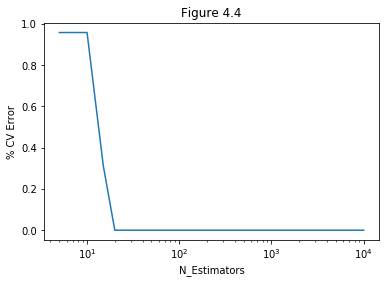

In [135]:
estimators = [5, 10, 15, 20, 30, 40, 50, 75, 100, 200, 500, 1000, 10000]
cverrors = []

#max leaves = 100
for i in estimators:
    model = RandomForestClassifier(criterion="entropy",n_estimators=i, max_leaf_nodes=100)
    model.fit(simpleTrain,trainDigits)
    accuracy = cross_val_score(model, trainFeatures, trainDigits, cv=10)   
    cverrors.append(100*(1 - accuracy.mean()))
    
mp.plot(estimators, cverrors)
mp.xscale("log")
mp.title("Figure 4.4")
mp.xlabel("N_Estimators")
mp.ylabel("% CV Error")
mp.show()

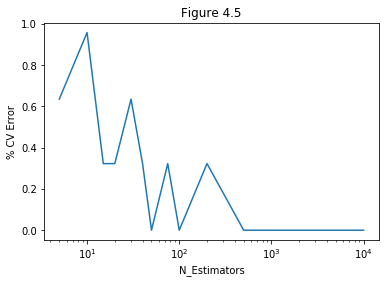

In [124]:
estimators = [5, 10, 15, 20, 30, 40, 50, 75, 100, 200, 500, 1000, 10000]
cverrors = []

#max leaves = 1000
for i in estimators:
    model = RandomForestClassifier(criterion="entropy",n_estimators=i, max_leaf_nodes=1000)
    model.fit(simpleTrain,trainDigits)
    accuracy = cross_val_score(model, trainFeatures, trainDigits, cv=10)   
    cverrors.append(100*(1 - accuracy.mean()))
    
mp.plot(estimators, cverrors)
mp.xscale("log")
mp.title("Figure 4.5")
mp.xlabel("N_Estimators")
mp.ylabel("% CV Error")
mp.show()

f: It looks like the max leaf nodes of 10 and 1000 were most affected. Note that in figures 4.3 and 4.5, there are fluctuations in the CV error between 10 to 500. As we increase the number of estimators to a much higher level, such as 1000, we see that these fluctuations completely disappear. When we are increasing the number of estimators, we are looking to reduce variance. These two figures show that we have effectively reduced the typical high variance that may be associated with a single decision tree. max leaves of 100 show less wild fluctuations than either of these two.

g: n_estimators looks to reduce the overall variance of the results and error by increasing the total number of decision trees. When we increase the number of estimators across all of our number of max leaves, we see a dramatic decrease in the CV error. We see that with for all of our figures, n_estimators over 400 result in no significant change. After these points, our error is maximally reduced and we do not see sudden spikes in our graph anymore.

In [ ]:
estimators = [5, 10, 15, 20, 30, 40, 50, 75, 100, 200, 500, 1000, 10000]
cverrors = []

#max leaves = 100, lowest CV error
for i in estimators:
    model = RandomForestClassifier(criterion="entropy",n_estimators=i, max_leaf_nodes=100)
    model.fit(simpleTrain,trainDigits)
    accuracy = cross_val_score(model, trainFeatures, trainDigits, cv=10)   
    cverrors.append(100*(1 - accuracy.mean()))

We have chosen our model of n_estimators = 15, with max_leaf_nodes = 100 as our lowest CV error model. This is because we see that this reaches the lowest possible CV the fastest at this point. Additionally, this makes sense because our at a different max leaf nodes of 10 or 1000, we are prone to either underfit or overfit. 

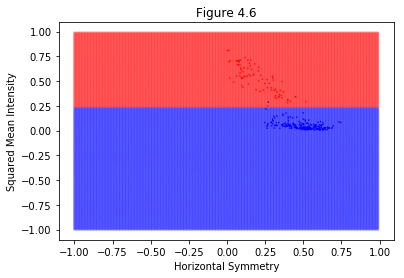

In [220]:
model = RandomForestClassifier(criterion="entropy",n_estimators=5, max_leaf_nodes=100)
model.fit(simpleTrain,trainDigits)

xPred = []
yPred = []
cPred = []
for xP in range(-100,100):
    xP = xP/100.0
    for yP in range(-100,100):
        yP = yP/100.0
        xPred.append(xP)
        yPred.append(yP)
        if(model.predict([[xP,yP]])=="1.0"):
            cPred.append("b")
        else:
            cPred.append("r")

mp.scatter(xPred,yPred,s=3,c=cPred,alpha=.2, )
mp.title("Figure 4.6")
mp.xlabel("Horizontal Symmetry")
mp.ylabel("Squared Mean Intensity")
mp.scatter(X,Y, s=.3, c=colors)
show()

In [162]:
leaves = [10,100,1000]
estimators = [1,10]
features = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]

dfL = []
dfF = []
dfE = []
dfCVE = []

model = RandomForestClassifier(criterion="entropy",n_estimators=5, max_leaf_nodes=100)

for i in leaves:
    for j in estimators:
        for k in features:
            dfL.append(i)
            dfF.append(k)
            dfE.append(j)
            model = RandomForestClassifier(criterion="entropy", n_estimators=j, max_leaf_nodes=i, max_features=k)
            model.fit(simpleTrain, trainDigits)
            accuracy = cross_val_score(model, trainFeatures, trainDigits, cv=10) 
            dfCVE.append(100* (1-accuracy.mean()))

df = DataFrame({'Leaves':dfL,
                'N_Estimators':dfE,
                'Features':dfF,
                '%CV Error':dfCVE
               })
df

,%CV Error,Features,Leaves,N_Estimators
0,3.508737,0.1,10,1
1,1.885081,0.2,10,1
2,0.645161,0.3,10,1
3,2.217742,0.4,10,1
4,2.237903,0.5,10,1
5,1.925403,0.6,10,1
6,1.270161,0.7,10,1
7,1.290323,0.8,10,1
8,1.885081,0.9,10,1
9,2.217742,1.0,10,1


In [163]:
leaves = [10,100,1000]
estimators = [100,1000]
features = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]

dfL = []
dfF = []
dfE = []
dfCVE = []

model = RandomForestClassifier(criterion="entropy",n_estimators=5, max_leaf_nodes=100)

for i in leaves:
    for j in estimators:
        for k in features:
            dfL.append(i)
            dfF.append(k)
            dfE.append(j)
            model = RandomForestClassifier(criterion="entropy", n_estimators=j, max_leaf_nodes=i, max_features=k)
            model.fit(simpleTrain, trainDigits)
            accuracy = cross_val_score(model, trainFeatures, trainDigits, cv=10) 
            dfCVE.append(100* (1-accuracy.mean()))

df = DataFrame({'Leaves':dfL,
                'N_Estimators':dfE,
                'Features':dfF,
                '%CV Error':dfCVE
               })
df

,%CV Error,Features,Leaves,N_Estimators
0,0.000000,0.1,10,100
1,0.000000,0.2,10,100
2,0.000000,0.3,10,100
3,0.000000,0.4,10,100
4,0.000000,0.5,10,100
5,0.322581,0.6,10,100
6,0.000000,0.7,10,100
7,0.947581,0.8,10,100
8,1.270161,0.9,10,100
9,0.947581,1.0,10,100


## Q1 J-M REVIEW GRAPH

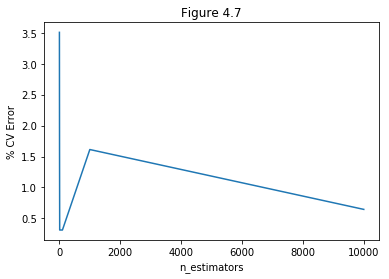

In [196]:
estimators = [1,5,10,100,1000,10000]
cverrors = []

for i in estimators:
    model = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(max_depth=1), n_estimators=i)
    model.fit(simpleTrain,trainDigits)
    accuracy = cross_val_score(model, trainFeatures, trainDigits, cv=10) 
    cverrors.append(100*(1 - accuracy.mean()))    
mp.plot(estimators,cverrors)
mp.title("Figure 4.7")
mp.xlabel("n_estimators")
mp.ylabel("% CV Error")
mp.show()

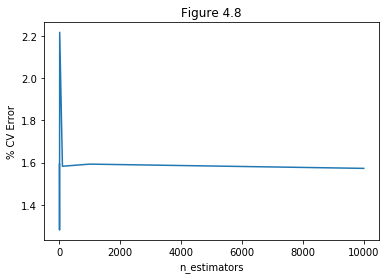

In [209]:
estimators = [1,5,10,100,1000,10000]
cverrors = []

for i in estimators:
    model = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(max_depth=10), n_estimators=i)
    model.fit(simpleTrain,trainDigits)
    accuracy = cross_val_score(model, trainFeatures, trainDigits, cv=10) 
    cverrors.append(100*(1 - accuracy.mean()))    
mp.plot(estimators,cverrors)
mp.title("Figure 4.8")
mp.xlabel("n_estimators")
mp.ylabel("% CV Error")
mp.show()

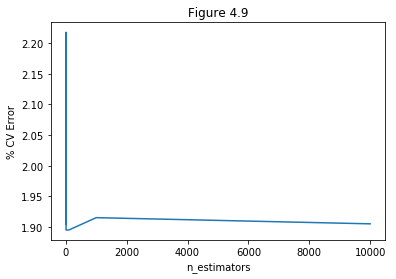

In [200]:
estimators = [1,5,10,100,1000,10000]
cverrors = []

for i in estimators:
    model = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(max_depth=1000), n_estimators=i)
    model.fit(simpleTrain,trainDigits)
    accuracy = cross_val_score(model, trainFeatures, trainDigits, cv=10) 
    cverrors.append(100*(1 - accuracy.mean()))    
mp.plot(estimators,cverrors)
mp.title("Figure 4.9")
mp.xlabel("n_estimators")
mp.ylabel("% CV Error")
mp.show()

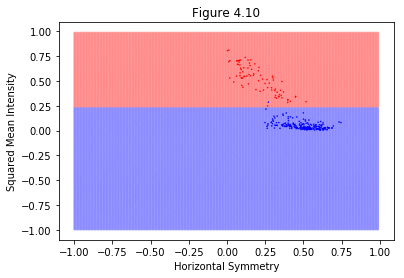

In [218]:
model = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(max_depth=100), n_estimators=1)
model.fit(simpleTrain,trainDigits)

xPred = []
yPred = []
cPred = []
for xP in range(-100,100):
    xP = xP/100.0
    for yP in range(-100,100):
        yP = yP/100.0
        xPred.append(xP)
        yPred.append(yP)
        if(model.predict([[xP,yP]])=="1.0"):
            cPred.append("b")
        else:
            cPred.append("r")

mp.scatter(xPred,yPred,s=1,c=cPred,alpha=.2, )
mp.title("Figure 4.10")
mp.xlabel("Horizontal Symmetry")
mp.ylabel("Squared Mean Intensity")

mp.scatter(X,Y, s=.3, c=colors)
show()

# Question 2: Bounds

In [240]:
test_X = []
test_Y = []
simpleTest = []
colors = []
for index in range(len(testFeatures)):
    test_X.append((sum(testFeatures[index])/256)**2) #mean intensity squared
    test_Y.append(sum((testFeatures[index][:128]- testFeatures[index][128:])**2)/256) #horiz symmetry
    simpleTest.append([(sum(testFeatures[index])/256)**2,sum((testFeatures[index][:128]- testFeatures[index][128:])**2)/256])
    if(testDigits[index]=="1.0"): #if the digit is 1, it is blue. else, it is red (only 1's and 5's)
        colors.append("b")
    else:
        colors.append("r")      

## Polynomial SVM (degree 1)

In [268]:
from sklearn.svm import SVC
import math

svc_model = SVC(C=1, kernel="poly", degree=1).fit(simpleTrain, trainDigits)  
accuracy = svc_model.score(simpleTest,testDigits)
error = 1-accuracy
print("Poly SVM error is:", error,"\n")
# print(len(testFeatures))

delta = [0.25, 0.05, 0.01]

for i in delta:
    print("Delta:",i)
#Markov    
    print("\tMarkov:\t\t",i,"\t", error, "+/-,",error/i)

#Chebyshev
    cb = math.sqrt(1/(4*len(testFeatures) * i))
    print("\tChebyshev:\t",i,"\t", error, "+/-", cb)

#Hoeffding
    hb = math.sqrt( (1/(2*len(testFeatures))) * math.log(8/i) )
    print("\tHoeffding:\t",i,"\t", error, "+/-", hb)

Poly SVM error is: 0.01601281024819856 

Delta: 0.25
	Markov:		 0.25 	 0.01601281024819856 +/-, 0.06405124099279424
	Chebyshev:	 0.25 	 0.01601281024819856 +/- 0.028295591748714637
	Hoeffding:	 0.25 	 0.01601281024819856 +/- 0.03724787624210981
Delta: 0.05
	Markov:		 0.05 	 0.01601281024819856 +/-, 0.3202562049639712
	Chebyshev:	 0.05 	 0.01601281024819856 +/- 0.06327086661370808
	Hoeffding:	 0.05 	 0.01601281024819856 +/- 0.045074326195730645
Delta: 0.01
	Markov:		 0.01 	 0.01601281024819856 +/-, 1.6012810248198561
	Chebyshev:	 0.01 	 0.01601281024819856 +/- 0.1414779587435732
	Hoeffding:	 0.01 	 0.01601281024819856 +/- 0.05172992827610272


## Neural Network (5 layers, 5 nodes)

In [273]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(activation="relu", epsilon=.001, max_iter=2000, alpha=0, solver="adam",
                   hidden_layer_sizes=(5,5,5,5,5))
mlp.fit(simpleTrain, trainDigits)

accuracy = mlp.score(simpleTest,testDigits)
error = 1-accuracy
print("Neural Network error is:", error,"\n")
# print(len(testFeatures))

delta = [0.25, 0.05, 0.01]

for i in delta:
    print("Delta:",i)
#Markov    
    print("\tMarkov:\t\t",i,"\t", error, "+/-,",error/i)

#Chebyshev
    cb = math.sqrt(1/(4*len(testFeatures) * i))
    print("\tChebyshev:\t",i,"\t", error, "+/-", cb)

#Hoeffding
    hb = math.sqrt( (1/(2*len(testFeatures))) * math.log(8/i) )
    print("\tHoeffding:\t",i,"\t", error, "+/-", hb)

Neural Network error is: 0.01040832666132907 

Delta: 0.25
	Markov:		 0.25 	 0.01040832666132907 +/-, 0.04163330664531628
	Chebyshev:	 0.25 	 0.01040832666132907 +/- 0.028295591748714637
	Hoeffding:	 0.25 	 0.01040832666132907 +/- 0.03724787624210981
Delta: 0.05
	Markov:		 0.05 	 0.01040832666132907 +/-, 0.2081665332265814
	Chebyshev:	 0.05 	 0.01040832666132907 +/- 0.06327086661370808
	Hoeffding:	 0.05 	 0.01040832666132907 +/- 0.045074326195730645
Delta: 0.01
	Markov:		 0.01 	 0.01040832666132907 +/-, 1.040832666132907
	Chebyshev:	 0.01 	 0.01040832666132907 +/- 0.1414779587435732
	Hoeffding:	 0.01 	 0.01040832666132907 +/- 0.05172992827610272


## Random Forest (100 leaves, 100 estimators)

In [279]:
model = RandomForestClassifier(criterion="entropy",n_estimators=100, max_leaf_nodes=100)
model.fit(simpleTrain, trainDigits)

accuracy = model.score(simpleTest,testDigits)
error = 1-accuracy
print("Random forest error is:", error,"\n")
# print(len(testFeatures))

delta = [0.25, 0.05, 0.01]

for i in delta:
    print("Delta:",i)
#Markov    
    print("\tMarkov:\t\t",i,"\t", error, "+/-,",error/i)

#Chebyshev
    cb = math.sqrt(1/(4*len(testFeatures) * i))
    print("\tChebyshev:\t",i,"\t", error, "+/-", cb)

#Hoeffding
    hb = math.sqrt( (1/(2*len(testFeatures))) * math.log(8/i) )
    print("\tHoeffding:\t",i,"\t", error, "+/-", hb)

Random forest error is: 0.008006405124099225 

Delta: 0.25
	Markov:		 0.25 	 0.008006405124099225 +/-, 0.0320256204963969
	Chebyshev:	 0.25 	 0.008006405124099225 +/- 0.028295591748714637
	Hoeffding:	 0.25 	 0.008006405124099225 +/- 0.03724787624210981
Delta: 0.05
	Markov:		 0.05 	 0.008006405124099225 +/-, 0.1601281024819845
	Chebyshev:	 0.05 	 0.008006405124099225 +/- 0.06327086661370808
	Hoeffding:	 0.05 	 0.008006405124099225 +/- 0.045074326195730645
Delta: 0.01
	Markov:		 0.01 	 0.008006405124099225 +/-, 0.8006405124099225
	Chebyshev:	 0.01 	 0.008006405124099225 +/- 0.1414779587435732
	Hoeffding:	 0.01 	 0.008006405124099225 +/- 0.05172992827610272


## Ada Boost (max depth 1, 10000 estimators)

In [281]:
model = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(max_depth=1), n_estimators=10000)
model.fit(simpleTrain, trainDigits)

accuracy = model.score(simpleTest,testDigits)
error = 1-accuracy
print("Random forest error is:", error,"\n")
# print(len(testFeatures))

delta = [0.25, 0.05, 0.01]

for i in delta:
    print("Delta:",i)
#Markov    
    print("\tMarkov:\t\t",i,"\t", error, "+/-,",error/i)

#Chebyshev
    cb = math.sqrt(1/(4*len(testFeatures) * i))
    print("\tChebyshev:\t",i,"\t", error, "+/-", cb)

#Hoeffding
    hb = math.sqrt( (1/(2*len(testFeatures))) * math.log(8/i) )
    print("\tHoeffding:\t",i,"\t", error, "+/-", hb)

Random forest error is: 0.009607686148919159 

Delta: 0.25
	Markov:		 0.25 	 0.009607686148919159 +/-, 0.038430744595676636
	Chebyshev:	 0.25 	 0.009607686148919159 +/- 0.028295591748714637
	Hoeffding:	 0.25 	 0.009607686148919159 +/- 0.03724787624210981
Delta: 0.05
	Markov:		 0.05 	 0.009607686148919159 +/-, 0.19215372297838318
	Chebyshev:	 0.05 	 0.009607686148919159 +/- 0.06327086661370808
	Hoeffding:	 0.05 	 0.009607686148919159 +/- 0.045074326195730645
Delta: 0.01
	Markov:		 0.01 	 0.009607686148919159 +/-, 0.9607686148919159
	Chebyshev:	 0.01 	 0.009607686148919159 +/- 0.1414779587435732
	Hoeffding:	 0.01 	 0.009607686148919159 +/- 0.05172992827610272


a: The polynomial SVM of degree 1 had the most significant change. For instance, when delta changed from .25 to .01, there was a change of magnitude 100 to the concentration bound. This was also apparent in neural networks, although on a much lesser scale.

b: I would argue that the Random Forest model would be a good model if presented with this problem. Noted in class that the hoeffding bound is the most common bound, we can see that the error associated with the problem itself is small (0.008) and at all levels of delta for all models, the hoeffding bound is the same. Therefore, this provides us with the smallest potential change to our error, and thus greatest amount of accuracy for the 99% bound.

c: We do have to consider that we directly chose which model was the best for each of these models already. For instance, in neural networks we considered specifically the 5 layer, 5 node model. We should and would need to account for this in a more complex situation (likely through the VC dimension). In our summary above, we did not directly take this into account and our hoeffding bound is the same for all models with all the same delta. In the future, we should take a further look into this for more accurate results (maybe a simple SVM of 1 degree is worse, but provides better accuracy since it is lower in complexity?).

# Question 3

a: Some of the first hardest hoops to hurdle through was just understanding Python syntax. This became easier over time, but some examples in class may have helped to warm us up. Additionally, for the first assignment it was a little vague in understanding what we were actually looking to do, especially because it was the first assignment. This became easier over the course since we got that knowledge later.

b: I learned a lot through the neural networks assignment. This forced me to not have to just apply some already existing libraries like sklearn, but really understand what was going on. This also forced me to learn Python a little better which I think benefitted me for the remainder of the homework.

c: When I didn't understand what was being asked or if I didn't know how to start, that took me the longest time. Even with sufficient googling, sometimes it is hard to put into practice what you are seeing online. I think with regards to this, maybe it would be more efficient to do simpler assignments that go on top of each other, but more frequent assignments. Personally I really mesh with this because it helps feed me information a little better (I do understand this is a graduate class though).

d: I found on youtube a person named StatQuest that really helped hone in a lot of topics I thought were confusing. I think he explains things that I couldn't fully understand after lecture in a very simple way and also provides examples, and also some Python code to also help see how it works too.

e: I really like the class and I think you are a good professor who really wants us to learn. I think there may be too much to cover over and so some of the stuff gets lost. This is coming from the perspective of a student who doesn't fully understand a lot of the background math, so maybe it is expected or different for graduate students, which I think the class is really tailored toward. For future iterations, I think the class would benefit from either more code examples, or else maybe more in depth analyses on some of the topics. I like and appreciate our topics examples though, like the neural network and how they work. 